Who knows how this will go? Certainly not me!

In [ ]:
# Ok so uh... how load data?
# Let's start with loading in libraries

import pandas as pd
from transformers import BertTokenizer
import random as rn
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# Idk what else we need?
# I'll figure it out as I go at least

# We'll go ahead and grab what we need for the word clouds. 
# Just because they're cool
from nltk.corpus import stopwords
from wordcloud import WordCloud

# This is for data cleaning
# We didn't need either of these
# import re
# import xml

# Ok now data? Or do I just pull that directly into a dataframe?
# That is correct, we pull it into a dataframe.

Ok so we have our imports (for now) so now we'll go ahead and set up some basic data frames, then append the app name to the description. Well, ok first we'll figure out which part of the descriptions to keep. I think we just keep the detailed description out of the set.

In [41]:
df_steam_base = pd.read_csv('./Data/steam.csv')
df_steam_base

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [42]:
df_steam_desc = pd.read_csv('./Data/steam_description_data.csv')
df_steam_desc

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...
...,...,...,...,...
27329,1065230,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",The Room of Pandora is a third-person interact...
27330,1065570,Have you ever been so lonely that no one but y...,Have you ever been so lonely that no one but y...,Cyber Gun is a hardcore first-person shooter w...
27331,1065650,<strong>Super Star Blast </strong>is a space b...,<strong>Super Star Blast </strong>is a space b...,Super Star Blast is a space based game with ch...
27332,1066700,Pursue a snow-white deer through an enchanted ...,Pursue a snow-white deer through an enchanted ...,Pursue a snow-white deer through an enchanted ...


In [43]:
# So now I need to find a way to set up a new dataframe 
# that pulls the game title based on the appid. 
# Then we'll have to clean up the html that's in there

# The tutorial says to just grab 10 lines to start so uh... 
# I guess we'll do that

steam_base_sub = df_steam_base.head(10)
df_steam_desc.columns

Index(['steam_appid', 'detailed_description', 'about_the_game',
       'short_description'],
      dtype='object')

In [44]:
merged_df = pd.merge(left=df_steam_desc, right=df_steam_base, left_on='steam_appid', right_on='appid')
merged_df.shape
merged_df.columns

Index(['steam_appid', 'detailed_description', 'about_the_game',
       'short_description', 'appid', 'name', 'release_date', 'english',
       'developer', 'publisher', 'platforms', 'required_age', 'categories',
       'genres', 'steamspy_tags', 'achievements', 'positive_ratings',
       'negative_ratings', 'average_playtime', 'median_playtime', 'owners',
       'price'],
      dtype='object')

In [45]:
working_data = merged_df[['steam_appid', 'name', 'detailed_description',
                          'developer', 'publisher', 'categories',
                          'genres', 'price']]
working_data['detailed_description']
# working_data.shape

0        Play the world's number 1 online action game. ...
1        One of the most popular online action games of...
2        Enlist in an intense brand of Axis vs. Allied ...
3        Enjoy fast-paced multiplayer gaming with Death...
4        Return to the Black Mesa Research Facility as ...
                               ...                        
27070    <img src="https://steamcdn-a.akamaihd.net/stea...
27071    Have you ever been so lonely that no one but y...
27072    <strong>Super Star Blast </strong>is a space b...
27073    Pursue a snow-white deer through an enchanted ...
27074    A portal has opened and dark magic is pouring ...
Name: detailed_description, Length: 27075, dtype: object

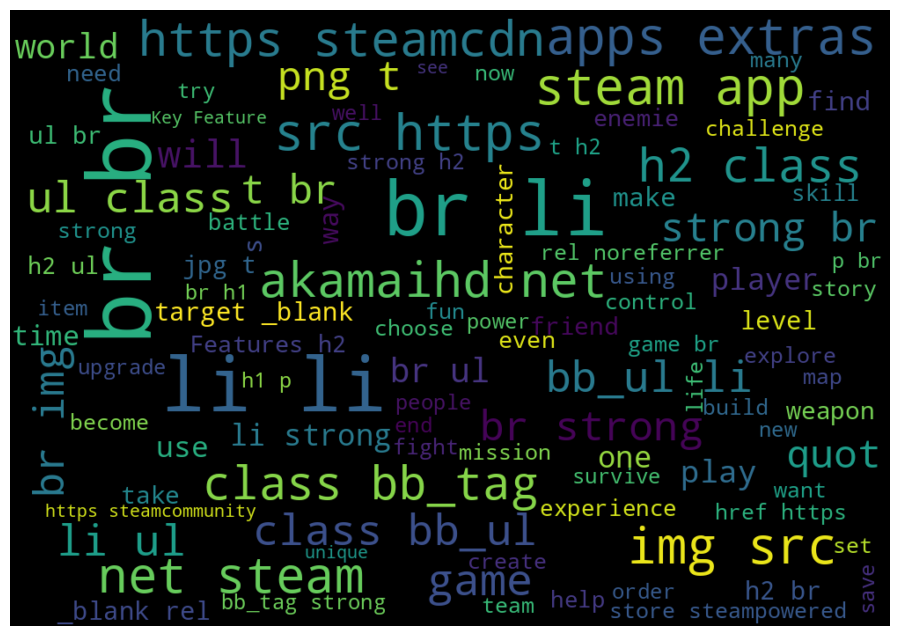

In [46]:
# Tbh I'm just going to make a general word cloud just because

txt = ' '.join(desc for desc in working_data.detailed_description)

plt.figure(figsize=(15, 8))

wordcloud = WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100,
    width=1000,
    height=700
).generate(txt)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

In [47]:
# Ok cool, so now I have a word map
# I'm unsure if I need to do any data cleaning
# I think I saw some line breaks in the description though

# The tutorial I'm following removes all punctuation, I'm not sure why though.
# It's also got a very meticulous cleaning of html, so let's see if this
# function from StackOverflow exists
# https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string

CLEANR = re.compile('<.*?>')

def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, ' ', raw_html)
    # print("clean!")
    return cleantext

# We'll try a different function here
def remove_tags(text):
    return ''.join(xml.etree.ElementTree.fromstring(text).itertext())

In [51]:
# So we made the function now we need to run it through the text?
# Yeeeeaaaahhhhhh

# df_clean = working_data.copy()
# df_clean['description'] = df_clean['detailed_description']
# df_clean['description'] = df_clean['description'].apply(remove_tags)

# df_clean['description']
# df_clean.to_csv('./Data/justtakingalook.csv')

# Let's try something else
# https://stackoverflow.com/questions/45999415/removing-html-tags-in-pandas
working_data['detailed_description'] = working_data['detailed_description'].str.replace(r'<[^<>]*>', '', regex=True)
working_data['detailed_description']
# working_data['detailed_description'].to_csv('./Data/justtakingalook.csv')

/tmp/ipykernel_20343/3423686014.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data['detailed_description'] = working_data['detailed_description'].str.replace(r'<[^<>]*>', '', regex=True)


0        Play the world's number 1 online action game. ...
1        One of the most popular online action games of...
2        Enlist in an intense brand of Axis vs. Allied ...
3        Enjoy fast-paced multiplayer gaming with Death...
4        Return to the Black Mesa Research Facility as ...
                               ...                        
27070    This is my first indie game on Steam. I played...
27071    Have you ever been so lonely that no one but y...
27072    Super Star Blast is a space based game with ch...
27073    Pursue a snow-white deer through an enchanted ...
27074    A portal has opened and dark magic is pouring ...
Name: detailed_description, Length: 27075, dtype: object